Use Keras to create a Neural Network with atleast one convolutional layer

In [4]:
#pip install keras

In [5]:
#pip install tensorflow

Load the MNIST data set.

In [6]:
# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


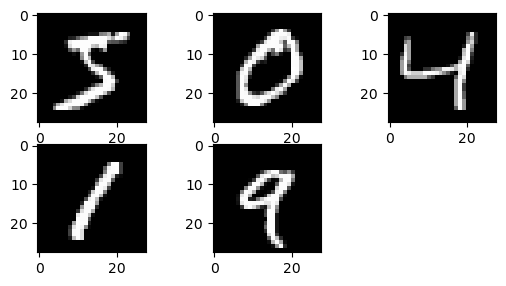

In [7]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(5):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

Build and train a Keras CNN classifier on the MNIST training set.

In [8]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [9]:
from keras.utils import to_categorical#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten#create model
model = Sequential()#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [11]:
#Compiling the model
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#train the model with 5 epochs
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2199 - accuracy: 0.9524 - val_loss: 0.0953 - val_accuracy: 0.9678
Epoch 2/3
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0687 - accuracy: 0.9793 - val_loss: 0.0932 - val_accuracy: 0.9739
Epoch 3/3
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0484 - accuracy: 0.9843 - val_loss: 0.0894 - val_accuracy: 0.9766


Report the test accuracy of your model.

In [13]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print("Test Accuracy : ",test_acc)


313/313 - 3s - loss: 0.0894 - accuracy: 0.9766 - 3s/epoch - 10ms/step
Test Accuracy :  0.9765999913215637


Display a confusion matrix on the test set classifications.

313/313 [==============================] - 3s 9ms/step


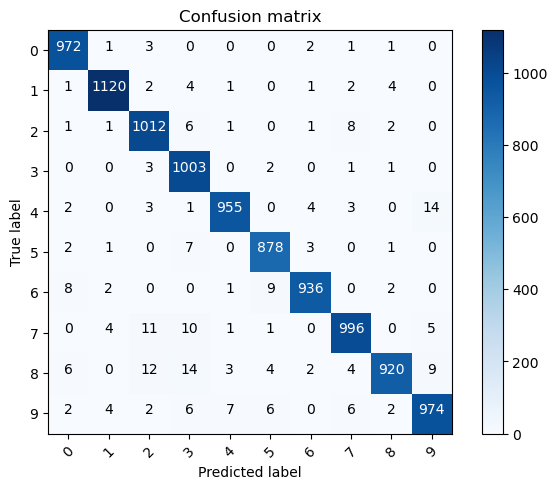

In [18]:
# Look at confusion matrix 
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = metrics.confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

Conclusion :
Looking at the confusion matrix, we can see for most of the digits, the prediction is good and accurate, but there are some cases where the prediction is not correct due to the similarity of the digits, like 4 someties are misprdicted as 9, 8 has been mispredicted as 3, there are somecases where 7 is predicted as 2 and 8 as 2.